# Visualizing Earnings Based on College Major

In this project, I will examine data from the American Community Survey about the job outcomes of students who graduated from college between 2010 and 2012. I am using a cleaned version of the dataset from FiveThirtyEight which can be found [here](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender, unemployment rates, and median salaries, among other things. 

## Import Data and Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline

In [2]:
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

The dataset is ordered based on rank by median earnings. The college major with the highest median earnings is Petroleum Engineering at \\$110,000. 

I also noticed that the number of men and women sum together to match the total number of graduates with that major, but the sample size is much lower. I also noticed that the full time and part time employees sum to a larger amount than the employed number, which doesn't make sense unless some people are employed both part time and full time, and the employed and unemployed numbers don't sum to the total number of graduates.

In [4]:
print(recent_grads.head())
print(recent_grads.tail())

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...              270                  

I can see that the five college majors with the highest median earnings are all in the engineering field. The majors with the lowest median earnings are in the biology, psychology, and education fields. The five majors with the highest earnings have medians ranging from \\$65,000 to \$110,000, while the five majors with the lowest earnings have medians ranging from \$22,000 to \$26,000.

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


I can see that there is an average of ~39K college graduates for each major between 2010 and 2012. On average, about 52% of the graduates for a given major are women. To calculate earnings, an average sample size of 356 was used for each major. The average unemployment rate across all majors is almost 7%, and the average median salary across all majors is \\$40,151. 

In [6]:
raw_data_count = len(recent_grads)
print(raw_data_count)

173


There are a total of 173 rows in the dataset. I will check if any of those rows contain missing values, which seems likely given that the descriptive statistics above showed that there was a count of only 172 for some of the columns. I will drop any rows with missing values from the dataset, since missing values will cause matplotlib to throw errors.

In [7]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print(cleaned_data_count)

172


As I expected, there was one row with missing values, so I dropped that row from the dataset.

## Scatter Plots

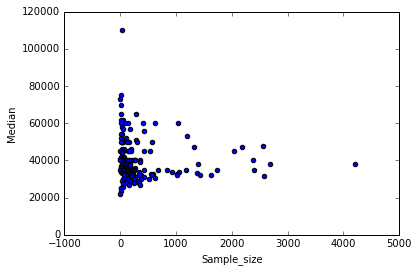

In [8]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter')

On the x axis, I plotted the sample size, which is the number of full-time, year-round employees with that major who were sampled for earnings, and on the y-axis, I plotted the median salary. Since sample size is proportional to the number of graduates with that major, I will use that as an indicator of how popular the major is.

The result shows that more popular majors generally tend to have salaries toward the lower end of the range, while less popular majors have salaries that span the range of about \\$20,000 - \$110,000.

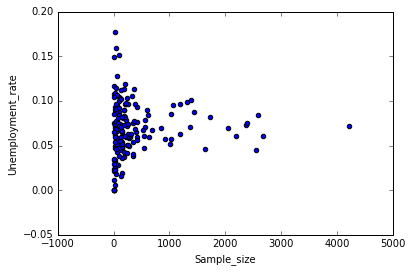

In [9]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter')

On the x axis, I plotted the sample size, and on the y-axis, I plotted the unemployment rate. More popular majors tend to have average unemployment rates (around 7%). Less popular majors have unemployment rates ranging from 0% to about 18%.

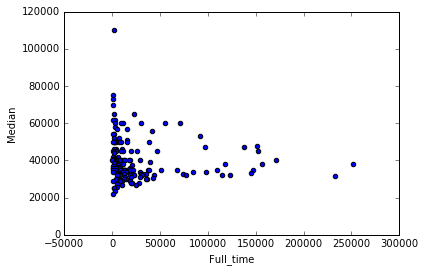

In [10]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter')

On the x-axis, I plotted the number of full-time employees, and on the y-axis, I plotted the median salary. The result shows that majors with more full-time employees generally tend to have salaries toward the lower end of the range. This coincides with the result regarding more popular majors having lower salaries, since more popular majors also probably have more full time employees.

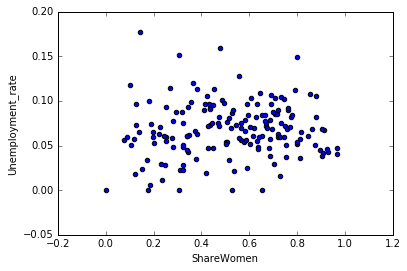

In [11]:
recent_grads.plot(x = 'ShareWomen', y = 'Unemployment_rate', kind = 'scatter')

There does not seem to be any correlation between the share of women in a major and the unemployment rate.

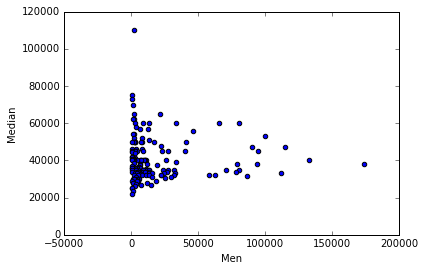

In [12]:
recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter')

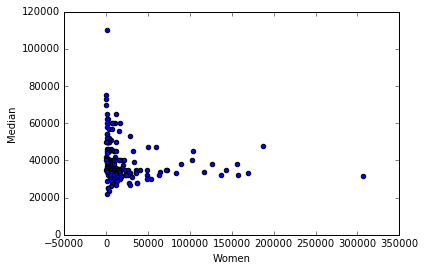

In [13]:
recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter')

The two plots above show that majors with more male graduates have median salaries that span the range of about \\$30,000 - \$60,000, whereas majors with more women graduates tend towards the lower end of the salary range (about \$30,000). This indicates that majors that are more female-heavy have lower median salaries.

## Histograms

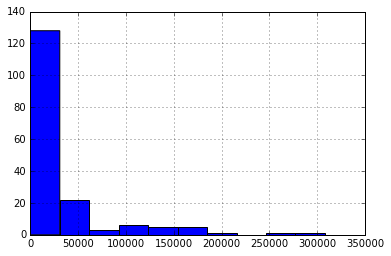

In [14]:
recent_grads['Employed'].hist()

Since the largest bin is the 0-50,000 range, I will explore that area further.

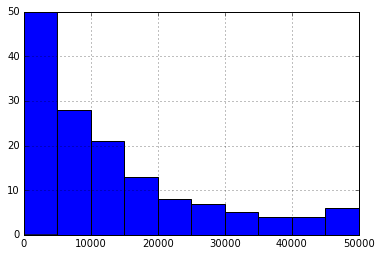

In [15]:
recent_grads['Employed'].hist(bins = 10, range = (0, 50000))

50 out of 172 majors had less than 5,000 people employed after graduation, and another almost 30 majors had between 5,000 and 10,000 people employed. I will compare this to the full-time employees.

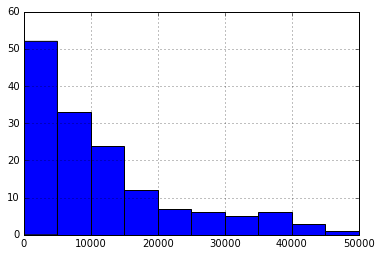

In [16]:
recent_grads['Full_time'].hist(bins = 10, range = (0, 50000))

This plot looks very similar to the employees plot, with about 50 out of the 172 majors having less than 5,000 full-time employees after graduation. This indicates that most people that are employed are employed full-time.

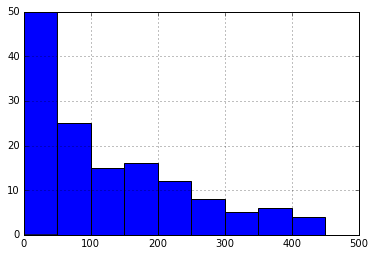

In [17]:
recent_grads['Sample_size'].hist(bins = 10, range = (0,500))

50 out of the 172 majors had a sample size, which is the number of full-time, year-round employees that were sampled for earnings, between 0 and 50. This means that the average sample size of 356 is being driven up by a few high outliers. This also means that the earnings data is based on relatively few data points compared to the total number of graduates for each major.

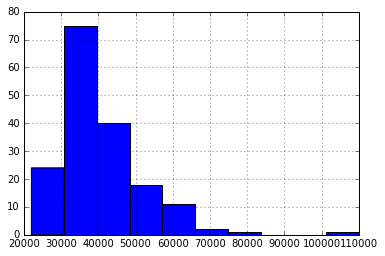

In [18]:
recent_grads['Median'].hist()

This shows that the majority of median salaries fall in the \\$30,000 to \$40,000 range. Almost half of the majors (about 75 out of 172) fall into this range. This coincides with the average median salary across all majors being \$40,151.

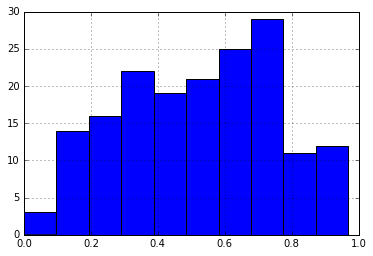

In [19]:
recent_grads['ShareWomen'].hist()

The percentage of women graduates in each major varies pretty widely. The largest number of majors fell in the 70% to 80% range, but there was a sizeable amount that fell in each bin between 10% and 90%. This means that there are some majors that are extremely female-heavy, but there are others that are extremely male-heavy, and there are about an equal number of each.

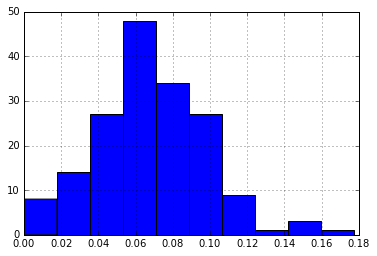

In [20]:
recent_grads['Unemployment_rate'].hist()

The unemployment rate is mostly around 5.5% - 7%, and it appears to follow pretty close to a normal distribution.

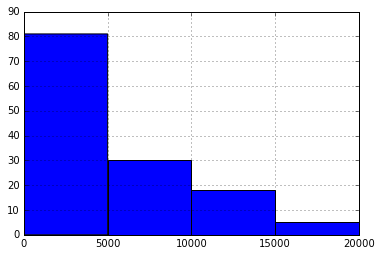

In [30]:
recent_grads['Men'].hist(bins = 4, range = (0, 20000))

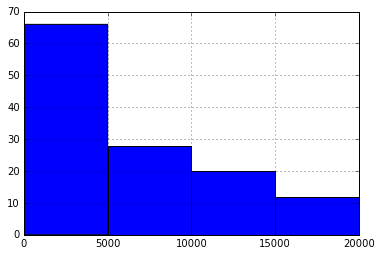

In [31]:
recent_grads['Women'].hist(bins = 4, range = (0, 20000))

The pattern for the number of male graduates and the number of female graduates is relately similar. Most majors have less than 5,000 men and less than 5,000 women. There are not many majors that have over 15,000 men or over 15,000 women.

## Scatter Matrices

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b77dd7128>,
      dtype=object)

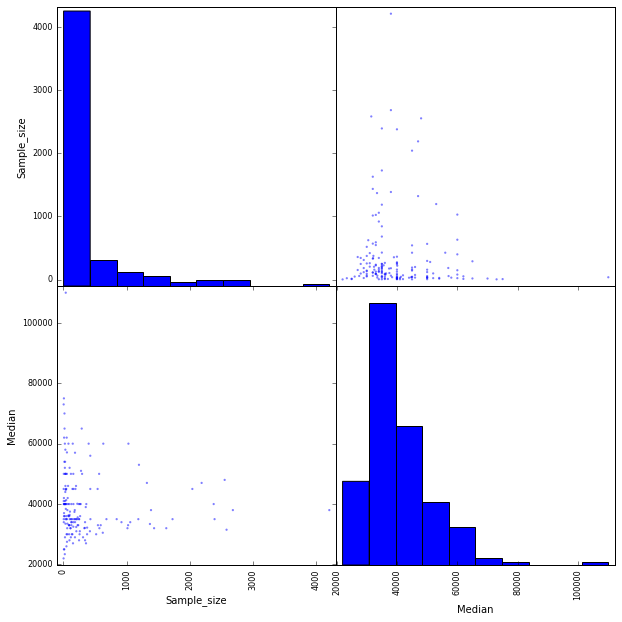

In [23]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10, 10))

Most majors don't have many graduates - there are only a few majors with a lot of graduates. Most majors also have median salaries towards the low end of the range, and there are very few majors with median salaries over about \\$70,000. However, the scatter plots show that the majors that have a lot of graduates are not the majors that also have high median earnings. In fact, the majors with high median earnings are actually ones with very few graduates, but there are other majors with very few graduates who have low median salaries. The only identifiable trend is that the very popular majors tend towards the average median salary of about \$40,000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b77c22898>,
      dtype=object)

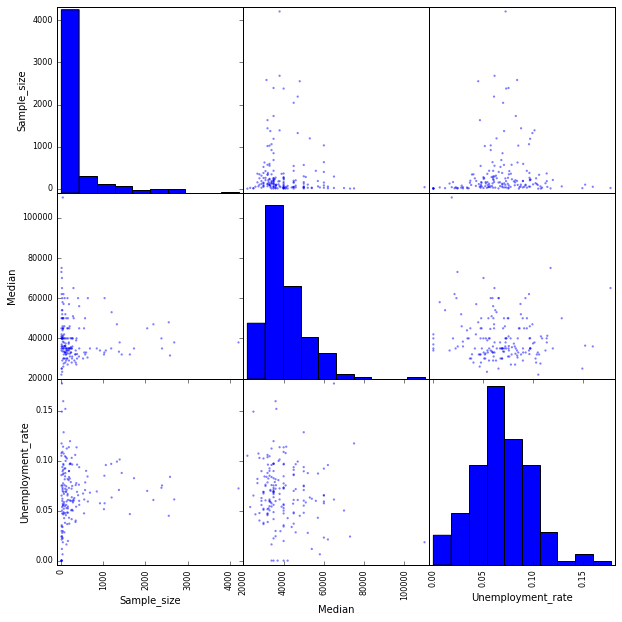

In [24]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (10, 10))

The unemployment rate follows a relatively normal distribution, with most majors falling in the middle of the range with an unemployment rate around 7%. There is no apparent correlation between median salary and unemployment rate, so it does not seem like majors that pay more also have higher or lower unemployment rates. The only noticable pattern between sample size and unemployment rate is that more popular majors tend to have average unemployment rates. This means that majors that are more popular do not also have higher unemployment rates because the job market is saturated or lower unemployment rates because there are more jobs available in that area.

## Bar Plots

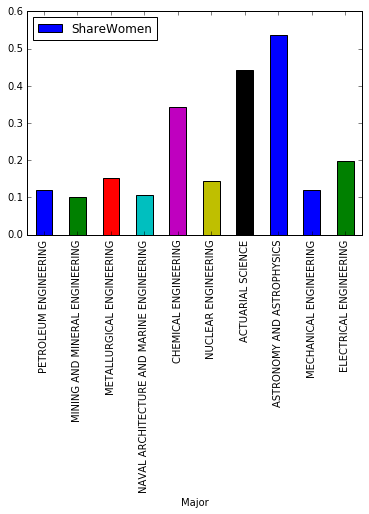

In [25]:
recent_grads[:10].plot.bar(x = 'Major', y = 'ShareWomen')

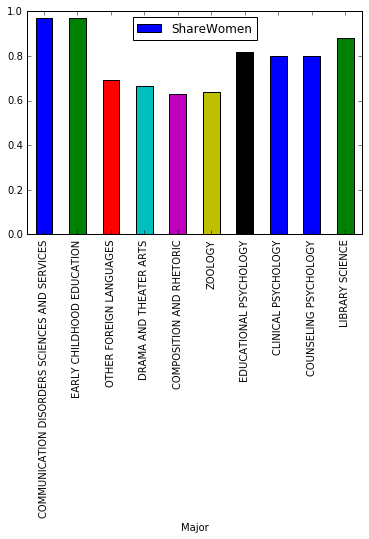

In [26]:
recent_grads[-10:].plot.bar(x = 'Major', y = 'ShareWomen')

The bar plots show that majors that don't pay well (i.e. have low median earnings) are more likely to be female dominated, while majors that pay well are more likely to be male dominated.

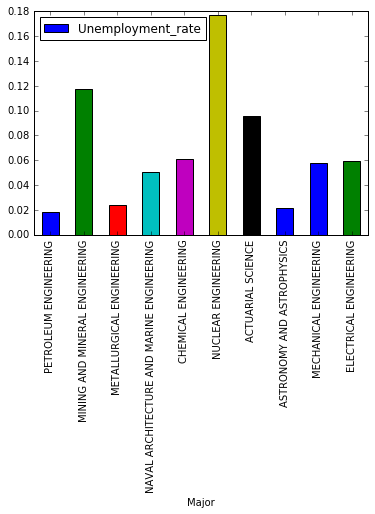

In [27]:
recent_grads[:10].plot.bar(x = 'Major', y = 'Unemployment_rate')

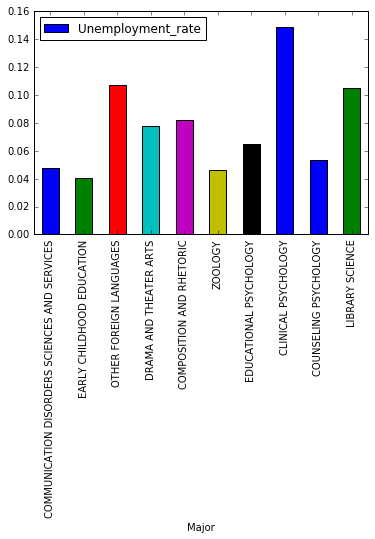

In [28]:
recent_grads[-10:].plot.bar(x = 'Major', y = 'Unemployment_rate')

It appears that the unemployment rates are relatively similar between the majors with the highest paying jobs and the majors with the lowest paying jobs. In particular, nuclear engineering has a really high unemployment rate, even though it pays well.

## Conclusion

Overall, I determined that female-dominated majors tend to pay less than male-dominated majors, but more popular majors pay around the average salary. I also learned that unemployment rates are around 7% on average and do not vary based on female/male proportion like salaries do. However, more popular majors tend to have around the average unemployment rate. Choosing a more popular major seems to predict a more average salary and unemployment rate, whereas choosing a less popular major could result in either a very high or very low salary or a very high or low unemployment rate.